# Resampling (15 pts)

---
### Collaborators
You MUST include a bulleted list with the full names of everyone you collaborated with on this assignment.
- Jane Doe
- John Doe

---
1. You measure the duration of high frequency bursts of action potentials under two different experimental conditions (call them conditions A and B). Based on your measured data (see below), decide whether or not the conditions affect the mean burst duration. See 1a-d below.

In [5]:
# burst durations in milliseconds for conditions A and B
import numpy as np
burstDursA = np.array([180.38809356, 118.54316518,  47.36070342, 258.43152543,
       157.58441772,  53.00241256,  97.87549106,  98.58339172,
         3.82151168, 149.63437886,  78.36434292, 207.1499196 ,
       249.99308288,  52.33575872, 177.16295745,  20.90902826,
       355.53831638,  17.14676607, 194.82448255, 364.30099202,
        10.46025411,  63.80995802, 186.96964679,  16.76391482,
        66.04825185, 169.95991378, 174.85051452,  95.51534595,
       164.81818483, 165.92316127,  21.99840476, 176.27450914,
       367.20238806,  53.55081561,  18.54310649, 309.36915353,
        34.8110391 , 170.70514854,   4.80755719, 185.70861565,
        42.81031454,  77.63480453,  22.78673497,  27.15480627,
        81.19289909,   7.5754338 , 143.53588895,   1.45355329,
        56.93153072,  35.7227909 , 120.88947208, 268.68459917,
        36.56451611, 335.29492244,  18.88246351, 698.21607381,
        47.24456065,  68.47935918, 246.50352868,  39.17939247,
       130.00962739,  12.63485608,  16.5060213 ,  85.73872575,
        30.34193446,  12.18596266, 133.13145381,  39.68448593,
       227.5104642 , 274.45272375, 167.76767172,  23.93871685,
       319.05649273,   6.3491122 ,  35.14797547, 170.29631475,
        33.54342976,   2.71282041, 134.5042415 ,  42.498552  ,
       144.87658813, 122.78633957,  46.58727698, 143.74260009,
        27.95191179, 462.66535543, 187.17111074,  21.05730056,
        27.92875799,  73.0405984 , 137.67114744,  25.51076087,
        68.71066451, 188.46823412,  20.58525518,  18.06289499,
       388.79209834,   9.42246312, 270.11609469,  20.51123798])
burstDursB = np.array([ 19.1579061 , 103.28099491, 155.40048778,  54.00532297,
        19.60552475,  38.33218511, 172.39377537, 100.60095889,
       123.39067736,  32.30752807, 140.81577413,  10.03036383,
        76.95250023, 111.4112118 , 106.77958145, 100.03741994,
        54.40736747, 169.72641863, 170.51048794,  84.31738796,
        32.48573515,  71.14968724,  18.07487628,  48.27775752,
       249.00817236,  40.88078534, 149.55876359, 171.68318734,
        64.7972247 , 179.67199065, 211.24354393,  49.54367304,
         5.97816835, 270.82356699,  99.33133967,  14.35603709,
        61.8917307 ,  48.13722571,  65.23703418, 119.95425274,
        64.3948595 ,  57.40459219,  18.76680104,  37.37173184,
       143.4622583 ,  21.6463496 ,  45.86107014,   3.98511098,
        11.8424448 , 105.59224929,  71.49909777,  29.64941255,
       117.62835465,  31.33284437, 124.17263642, 249.31437673,
        92.15958114,  66.2842341 ,   5.01333126,  18.53478564,
        44.09316335, 119.8752612 ,  52.31171617,   3.03888107,
       109.94031571,   5.52411681,  43.88839751,  48.63036147,
        22.71317076,  30.20052081,  32.10942778, 117.08796453,
        53.83369891,  68.82006208,  92.29204674,  93.829404  ,
         0.67985216,  10.42751195,   4.35827727, 127.21452508,
        42.69414115,  34.9520911 ,  20.16096766, 178.44190716,
        43.04340469,  89.11997718, 163.48474361, 277.29716851,
        17.08902205, 103.74782303,  49.29308393,  72.1459098 ,
        11.4600829 ,   4.09194418,  51.55511185,  91.81103802,
        31.36955782,  23.24407568,  90.13594215,  69.37118937])

1a. (1 pt) State the null and alternative hypotheses.

Null Hypothesis: There is NO significant difference between conditions A and B on the mean burst duration (conditions A and B come from the same distribution)
Alternative Hypothesis: There is a significant difference between conditions A and B on the mean burst duration

1b. (2 ps) Plot the burst duration distributions for conditions A and B overlaid on each other. Make each histogram semitransparent to better visualize the overlap.

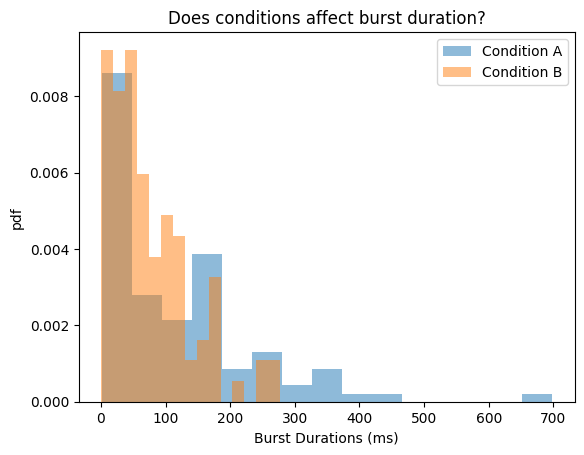

In [4]:
import scipy.stats as st
import matplotlib.pyplot as plt

plt.hist(burstDursA, bins=15, density=True, alpha=0.5, label='Condition A')
plt.hist(burstDursB, bins=15, density=True, alpha=0.5, label='Condition B')
plt.xlabel('Burst Durations (ms)');
plt.ylabel('pdf')
plt.title('Does conditions affect burst duration?')
plt.legend();

1c. (3 pts) Use a permutation test with 1000 permutations to test your null hypothesis. Compute the difference between the means for conditions A and B for each permutation. *You don't need to plot anything here, see next question for that.*

In [6]:
all_burst_durations = np.hstack([burstDursA, burstDursB])

# Generate 1000 permutations of mixtures of open times from both wildtype and mutant.
# For each permutation store the difference between the means of the permuted data sets.
num_permutations = 1000
permuted_mean_diffs = np.zeros((num_permutations,))

for i in range(num_permutations):
    # shuffle the concatenated open time data
    np.random.shuffle(all_burst_durations)
    
    # split permuted open times in wildtype and mutant sample sets
    permuted_condition_A = all_burst_durations[:len(burstDursA)]
    permuted_condition_B = all_burst_durations[-len(burstDursB):]
    
    permuted_mean_diffs[i] = permuted_condition_B.mean() - permuted_condition_A.mean()

1d. (3 pts) Plot the distribution of permuted statistics (difference between the means for conditions A and B) and indicate with a vertical line the measured difference between the means for conditions A and B. Also indicate with dashed vertical lines the 95% confidence interval for the permuted differences. Finally, reject or do not reject your null hypothesis.

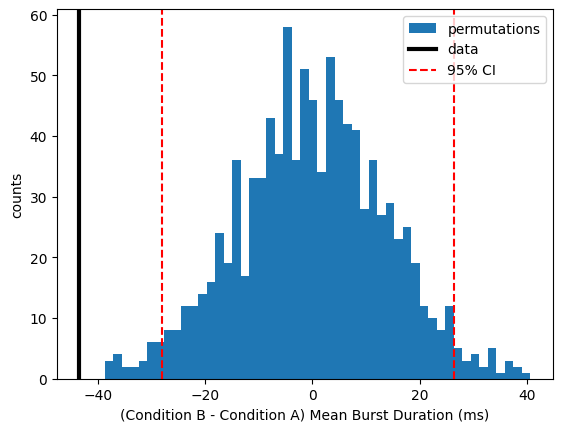

In [8]:
lb, ub = np.quantile(permuted_mean_diffs, [0.025, 0.975])
measured_mean_diff = burstDursB.mean() - burstDursA.mean()
plt.hist(permuted_mean_diffs, bins=50, label='permutations');
plt.axvline(measured_mean_diff, lw=3, color='k', label='data')
plt.axvline(lb, ls='--', color='r', label='95% CI')
plt.axvline(ub, ls='--', color='r');
plt.xlabel('(Condition B - Condition A) Mean Burst Duration (ms)')
plt.ylabel('counts')
plt.legend();

#reject the null hypothesis because the data is outside of the 95% confidence interval which means we can say that we are more than 95% confident the data is not within the same distribution
#thus, the type of condition does affect mean burst duration.


---
2. For the same neuron as in #1 above, report your estimate for the variability in burst durations and your confidence in this estimate. See 2a-b below.

2a. (3 pts) Compute 1000 bootstrapped standard deviations for resampled burst durations from condition A. *You don't need to plot anything yet.*

2b. (3 pts) Compute the 95% confindence interval for your bootstrapped distribution of standard deviations. Plot the distiribution and indicate with vertical lines the 95% confidence interval for the burst durations in condition A and also the measured standard deviation.